In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd
df = pd.read_csv(filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

#### Visualizing the data

     sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica


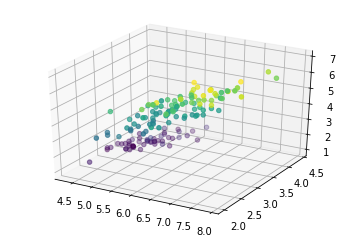

In [2]:
print(df.tail())
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=X[:,3])
plt.show()

#### Centering the data

In [3]:
mean_vec = np.mean(X, axis=0)
X = X - mean_vec

#### Finding the covariance matrix

In [4]:
cor_mat = np.corrcoef(X.T)

#### Finding the eigenvalues and eigenvectors

In [5]:
eig_vals, eig_vecs = np.linalg.eig(cor_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [6]:
# Sorting the eigen vectors in descending order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs:
    print(i[0])

2.910818083752052
0.9212209307072241
0.1473532783050959
0.020607707235623763


#### Percentage of variance held by each principal component:

In [7]:
total = sum(eig_vals)
var_exp = [(i[0] / total)*100 for i in (eig_pairs)]
print(var_exp)

[72.77045209380137, 23.03052326768063, 3.6838319576274015, 0.5151926808905947]


#### Reduction of data-dimension

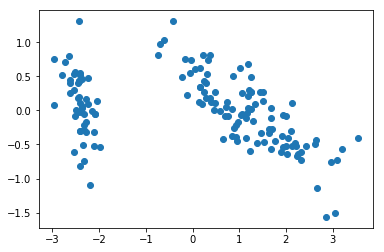

In [8]:
proj_mat = eig_vecs[ : , 0:2]
#PROJECT ALONG NEW AXES
Y = X.dot(proj_mat)
plt.scatter(Y[:,0],Y[:,1])
plt.show()